# PR-0012 

## Business Case:

ABC Tech is an mid-size organisation operation in IT-enabled business 
segment over a decade. On an average ABC Tech receives 22-25k IT 
incidents/tickets , which were handled to best practice ITIL framework 
with incident management , problem management, change management 
and configuration management processes. These ITIL practices attained 
matured process level and a recent audit confirmed that further 
improvement initiatives may not yield return of investment. 
ABC Tech management is looking for ways to improve the incident 
management process as recent customer survey results shows that 
incident management is rated as poor. 
Machine Learning as way to improve ITSM processes 
ABC Tech management recently attended Machine Learning conference on 
ML for ITSM. 
Machine learning looks prospective to improve ITSM processes through 
prediction and automation. They came up with 4 key areas, where ML can 
help ITSM process in ABC Tech. 
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so 
that they can take preventive measures or fix the problem before 
it surfaces. 
2. Forecast the incident volume in different fields , quarterly and 
annual. So that they can be better prepared with resources and 
technology planning. 
3. Auto tag the tickets with right priorities and right departments so 
that reassigning and related delay can be reduced. 
4. Predict RFC (Request for change) and possible failure / 
misconfiguration of ITSM assets. 

# Project Goal

# CONNECTING SQL DATA 

In [6]:
from sqlalchemy import create_engine
import urllib.parse

# Database credentials
USERNAME = "dm_team"
PASSWORD = "DM!$Team@&27920!"  # Special characters here need encoding
HOST = "18.136.157.135"
PORT = "3306"
DATABASE = "project_itsm"

# Encode the password
encoded_password = urllib.parse.quote_plus(PASSWORD)

# Correct SQLAlchemy connection string
DATABASE_TYPE = "mysql+pymysql"
engine = create_engine(f"{DATABASE_TYPE}://{USERNAME}:{encoded_password}@{HOST}:{PORT}/{DATABASE}", echo=True)




In [7]:
import pandas as pd

query = "SELECT * FROM dataset_list;"  # Replace with actual table name
df = pd.read_sql(query, con=engine)

# Display first few rows
print(df.head())


2025-03-25 18:42:28,449 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2025-03-25 18:42:28,453 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-03-25 18:42:28,655 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2025-03-25 18:42:28,657 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-03-25 18:42:28,757 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2025-03-25 18:42:28,760 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-03-25 18:42:28,961 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-03-25 18:42:28,963 INFO sqlalchemy.engine.Engine DESCRIBE `project_itsm`.`SELECT * FROM dataset_list;`
2025-03-25 18:42:28,964 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-03-25 18:42:29,063 INFO sqlalchemy.engine.Engine SELECT * FROM dataset_list;
2025-03-25 18:42:29,066 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-03-25 18:42:34,943 INFO sqlalchemy.engine.Engine ROLLBACK
     CI_Name          CI_Cat              CI_Subcat        WBS Incident_ID  \
0  SUB000508  subapplication  Web

## Importing with Libraries:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

## DOMAIN ANALYSIS
### 1️⃣ ITSM (IT Service Management) focuses on managing IT services efficiently, ensuring minimal disruptions and quick incident resolutions.
### 2️⃣ Incident Management is a key ITSM process that logs, tracks, and resolves IT issues to maintain business continuity.
### 3️⃣ Data-driven decision-making helps predict incident priority using machine learning, improving response times and resource allocation.
### 4️⃣ Key factors like Impact, Urgency, and Resolution Time determine the severity of incidents and their priority levels.
### 5️⃣ Automating incident classification with ML enhances IT support efficiency, reduces manual effort, and improves service quality.

## BASIC CHECKS

In [12]:
df.head()   # showing first 5 rows and columns

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [13]:
df.tail()   # showing last 5 rows and columns

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,...,,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,,,


In [14]:
df.shape  # it showing number of rows and columns and data 

(46606, 25)

In [15]:
df.columns # it showing  entire number of  columns of the  data 

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [16]:
df.info() # it showing information about each data type of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [17]:
df.describe() # it showing staistics of the data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,...,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,...,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,...,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,...,44322,1780,21,236,16470,43058,3434,45384,46046,46046


#  Exploratory Data Analysis(EDA)

# Line Plot   

1.Ticket Volume Over Time Shows how many incidents are reported over time.

In [21]:
df['Open_Time'] = pd.to_datetime(df['Open_Time'], format="%d-%m-%Y %H:%M", errors='coerce')


In [22]:
print(df[df['Open_Time'].isna()])  # Shows rows where datetime conversion failed


Empty DataFrame
Columns: [CI_Name, CI_Cat, CI_Subcat, WBS, Incident_ID, Status, Impact, Urgency, Priority, number_cnt, Category, KB_number, Alert_Status, No_of_Reassignments, Open_Time, Reopen_Time, Resolved_Time, Close_Time, Handle_Time_hrs, Closure_Code, No_of_Related_Interactions, Related_Interaction, No_of_Related_Incidents, No_of_Related_Changes, Related_Change]
Index: []

[0 rows x 25 columns]


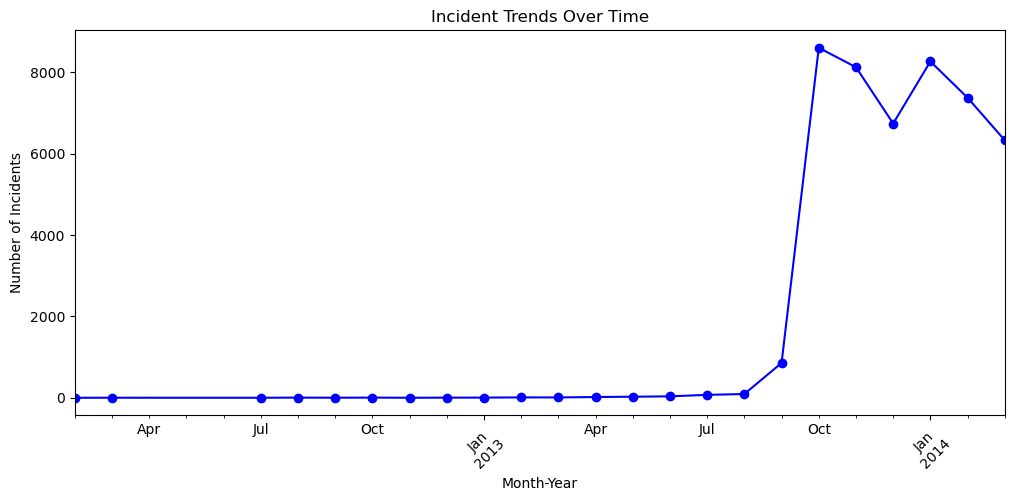

In [23]:
df['Month_Year'] = df['Open_Time'].dt.to_period("M")  # Group by month

plt.figure(figsize=(12, 5))
df.groupby('Month_Year').size().plot(kind='line', marker='o', color='b')
plt.xlabel("Month-Year")
plt.ylabel("Number of Incidents")
plt.title("Incident Trends Over Time")
plt.xticks(rotation=45)
plt.show()

# Count plot

2. Priority Distribution of Tickets Helps understand how many tickets are high priority vs low priority.

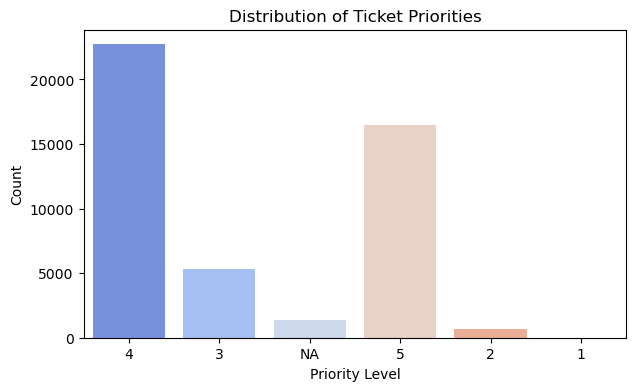

In [26]:
plt.figure(figsize=(7, 4))
sns.countplot(x=df['Priority'], palette="coolwarm")
plt.title("Distribution of Ticket Priorities")
plt.xlabel("Priority Level")
plt.ylabel("Count")
plt.show()


# BAR PLOT

3. Incident Categories Distribution Helps identify the most common issue types

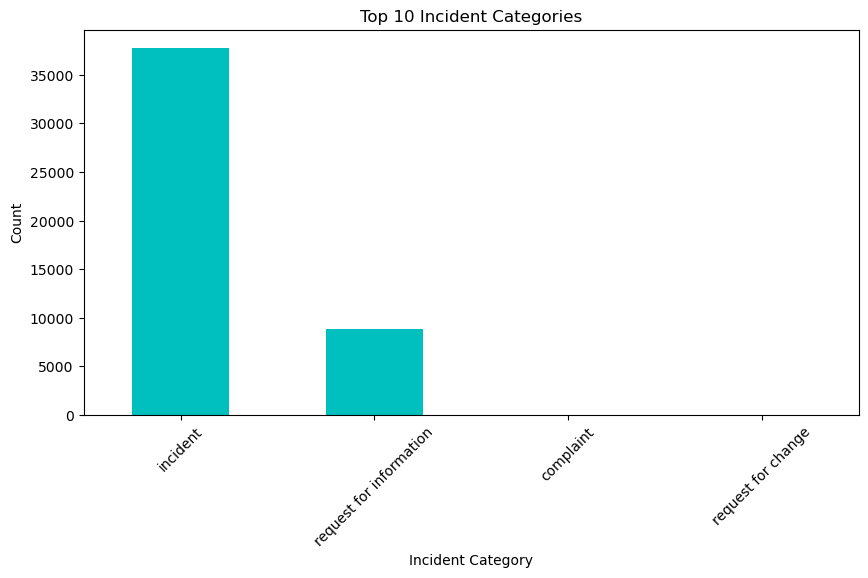

In [29]:
plt.figure(figsize=(10, 5))
df['Category'].value_counts().nlargest(10).plot(kind='bar', color='c')
plt.xlabel("Incident Category")
plt.ylabel("Count")
plt.title("Top 10 Incident Categories")
plt.xticks(rotation=45)
plt.show()


# Bar Plot

In [31]:
df["Open_Time"] = pd.to_datetime(df["Open_Time"], format="%d-%m-%Y %H:%M", errors='coerce')
df["Close_Time"] = pd.to_datetime(df["Close_Time"], format="%d-%m-%Y %H:%M", errors='coerce')

In [32]:
print(df[df['Open_Time'].isna()])  # Shows rows where datetime conversion failed
print(df[df['Close_Time'].isna()])

Empty DataFrame
Columns: [CI_Name, CI_Cat, CI_Subcat, WBS, Incident_ID, Status, Impact, Urgency, Priority, number_cnt, Category, KB_number, Alert_Status, No_of_Reassignments, Open_Time, Reopen_Time, Resolved_Time, Close_Time, Handle_Time_hrs, Closure_Code, No_of_Related_Interactions, Related_Interaction, No_of_Related_Incidents, No_of_Related_Changes, Related_Change, Month_Year]
Index: []

[0 rows x 26 columns]
Empty DataFrame
Columns: [CI_Name, CI_Cat, CI_Subcat, WBS, Incident_ID, Status, Impact, Urgency, Priority, number_cnt, Category, KB_number, Alert_Status, No_of_Reassignments, Open_Time, Reopen_Time, Resolved_Time, Close_Time, Handle_Time_hrs, Closure_Code, No_of_Related_Interactions, Related_Interaction, No_of_Related_Incidents, No_of_Related_Changes, Related_Change, Month_Year]
Index: []

[0 rows x 26 columns]


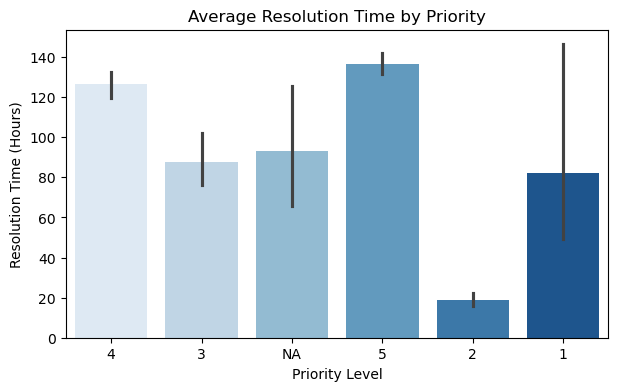

In [33]:
df["Resolution_Time_Hrs"] = (df["Close_Time"] - df["Open_Time"]).dt.total_seconds() / 3600

plt.figure(figsize=(7, 4))
sns.barplot(x="Priority", y="Resolution_Time_Hrs", data=df, palette="Blues")
plt.title("Average Resolution Time by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Resolution Time (Hours)")
plt.show()


In [34]:
print(df.dtypes)  # Shows data types of all columns


CI_Name                               object
CI_Cat                                object
CI_Subcat                             object
WBS                                   object
Incident_ID                           object
Status                                object
Impact                                object
Urgency                               object
Priority                              object
number_cnt                            object
Category                              object
KB_number                             object
Alert_Status                          object
No_of_Reassignments                   object
Open_Time                     datetime64[ns]
Reopen_Time                           object
Resolved_Time                         object
Close_Time                    datetime64[ns]
Handle_Time_hrs                       object
Closure_Code                          object
No_of_Related_Interactions            object
Related_Interaction                   object
No_of_Rela

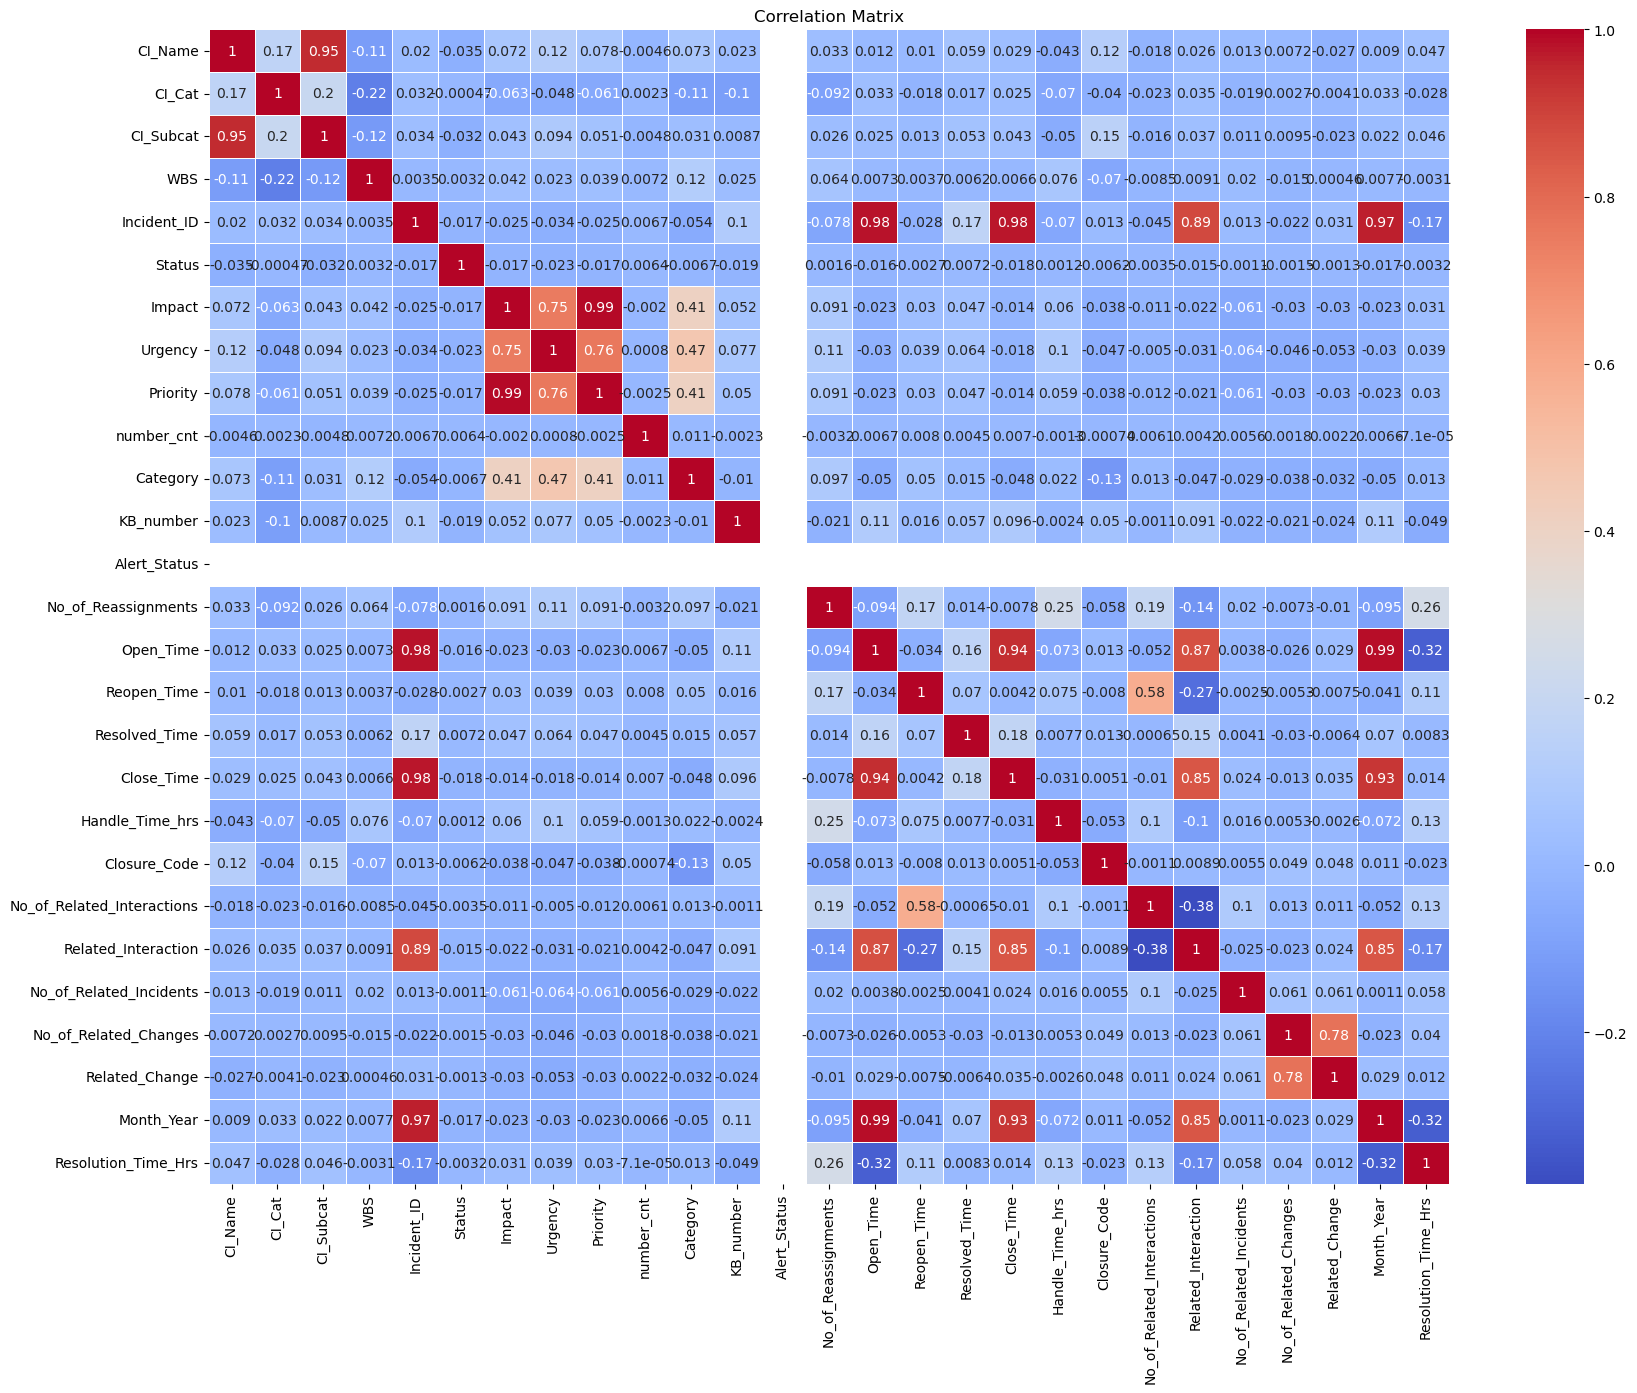

In [35]:
from sklearn.preprocessing import LabelEncoder # Correlations of all columns

# Convert non-numeric columns to numeric
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# Convert datetime columns to numeric
df["Open_Time"] = pd.to_datetime(df["Open_Time"]).apply(lambda x: x.timestamp())
df["Close_Time"] = pd.to_datetime(df["Close_Time"]).apply(lambda x: x.timestamp())

# Convert period column to numeric
df["Month_Year"] = df["Month_Year"].apply(lambda x: x.to_timestamp().timestamp())

# Create correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Data preprocessing

 ## Deleting Unrequired data

In [38]:
df.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change',
       'Month_Year', 'Resolution_Time_Hrs'],
      dtype='object')

In [39]:
# Drop columns by name
df = df.drop(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact', 'Urgency',  'Category',
              'KB_number', 'Alert_Status', 'Closure_Code', 'Related_Interaction', 'Related_Change'],axis=1)

In [40]:
df

,Priority,number_cnt,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Month_Year,Resolution_Time_Hrs
0,3,28044,20,1.328449e+09,0,3526,1.383573e+09,19911,1,10,0,1.328054e+09,15312.316667
1,2,19341,27,1.331567e+09,76,1181,1.385988e+09,21448,1,1,0,1.330560e+09,15116.866667
2,5,24089,23,1.333025e+09,0,13274,1.389626e+09,22732,1,0,0,1.330560e+09,15722.616667
3,3,29998,6,1.342526e+09,0,15382,1.384421e+09,21363,1,0,0,1.341101e+09,11637.700000
4,3,16110,13,1.344596e+09,0,8422,1.383919e+09,18369,1,0,0,1.343779e+09,10922.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,3,10891,1,1.396283e+09,0,33128,1.396283e+09,331,1,0,0,1.393632e+09,0.100000
46602,3,37599,1,1.396278e+09,0,33099,1.396280e+09,1497,1,0,0,1.393632e+09,0.433333
46603,4,42720,1,1.396280e+09,0,33101,1.396280e+09,248,1,0,0,1.393632e+09,0.066667
46604,3,32679,1,1.396280e+09,0,33108,1.396281e+09,407,1,0,0,1.393632e+09,0.116667


## Handling Outliers

In [42]:
#Boxplot

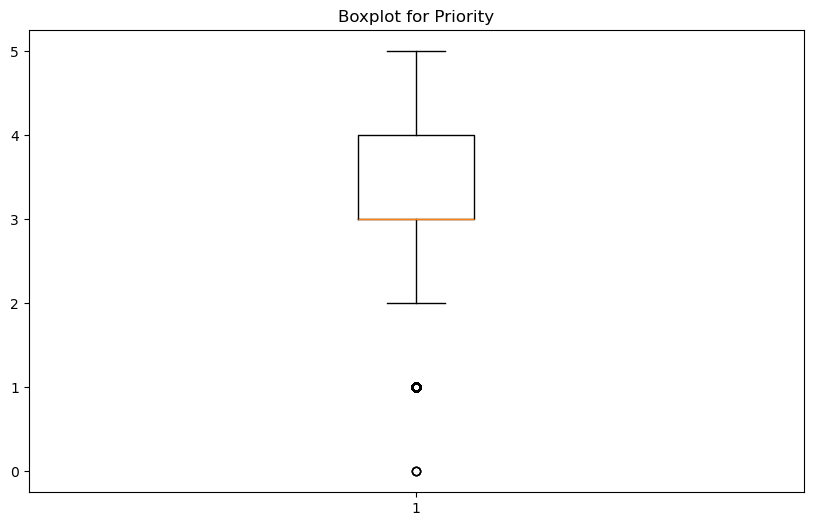

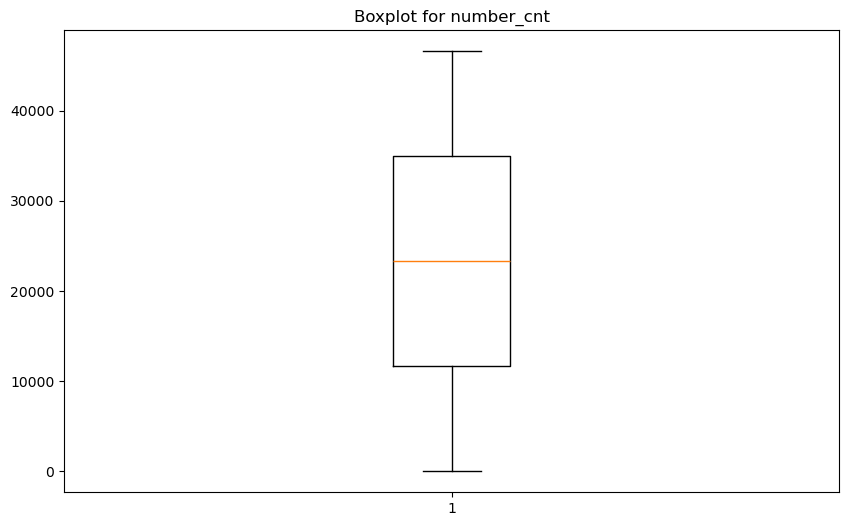

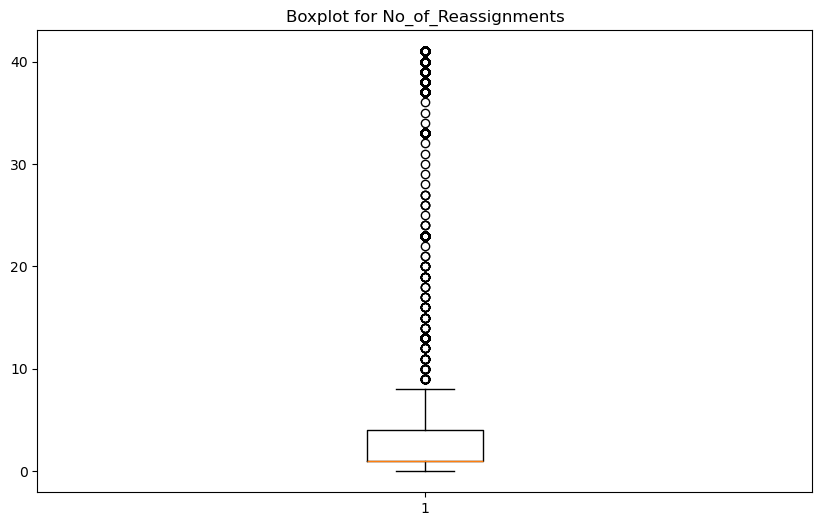

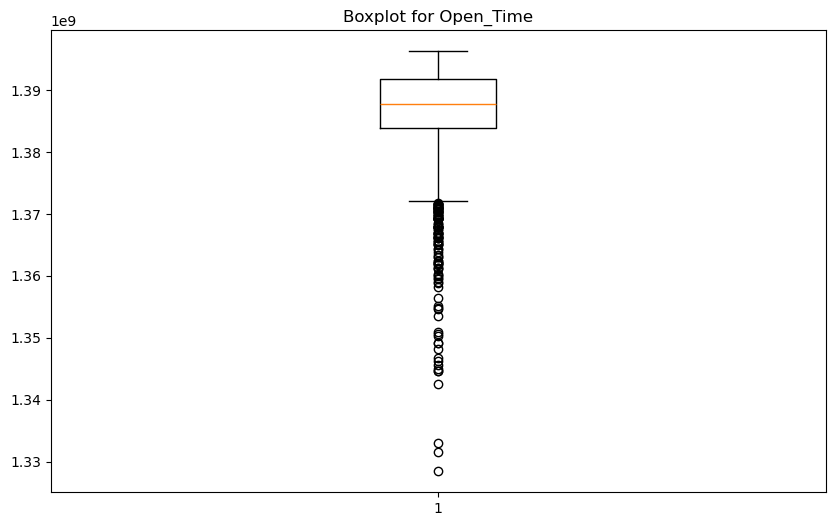

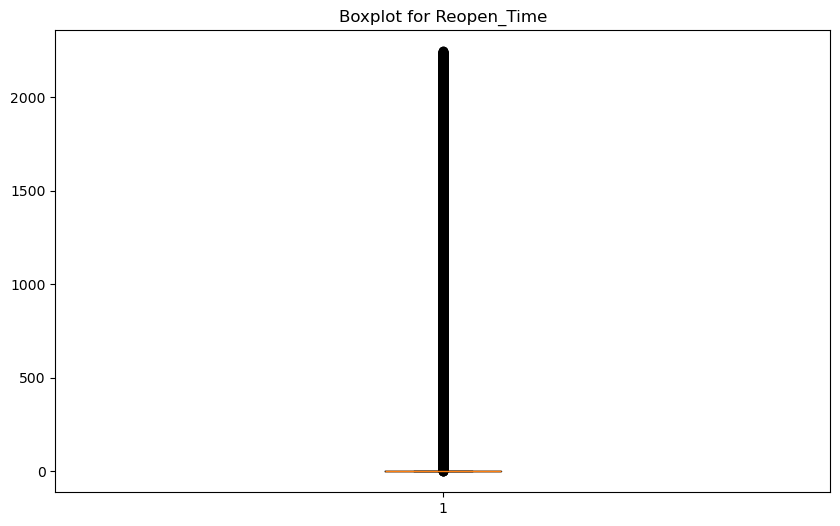

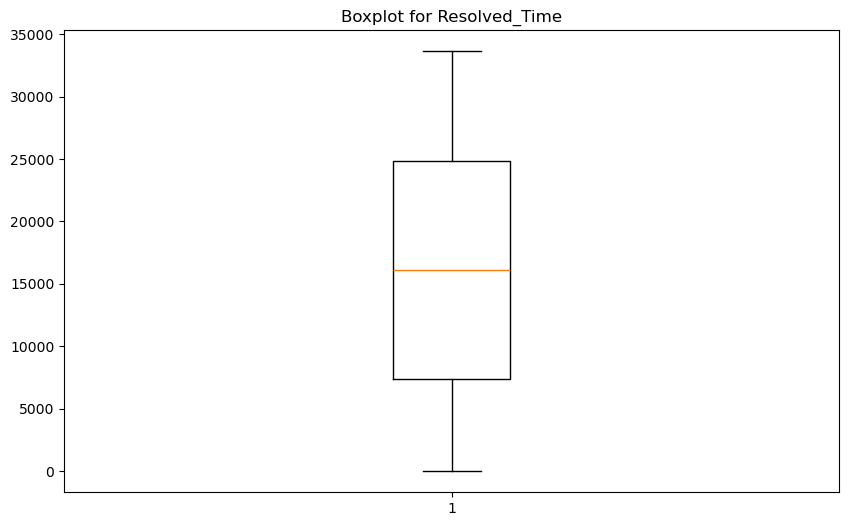

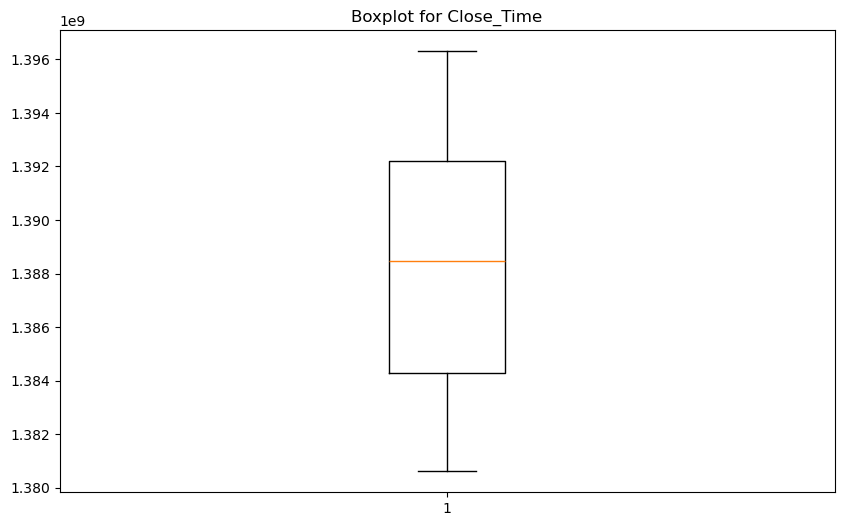

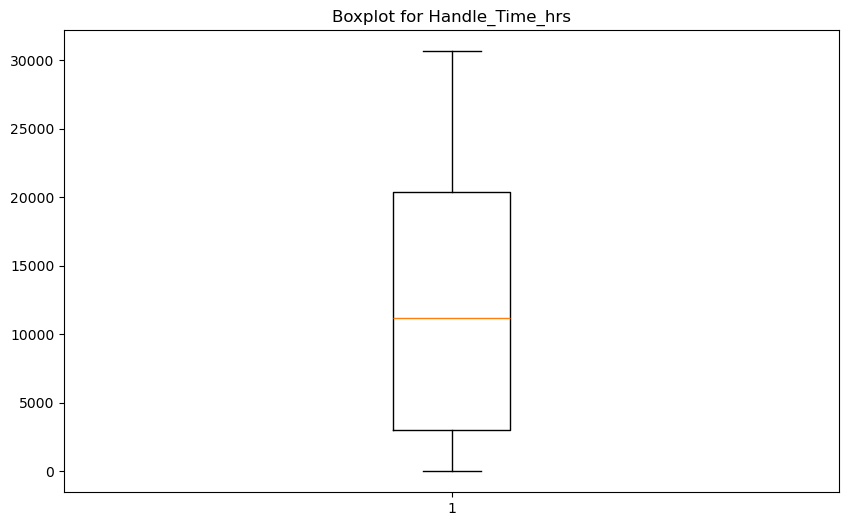

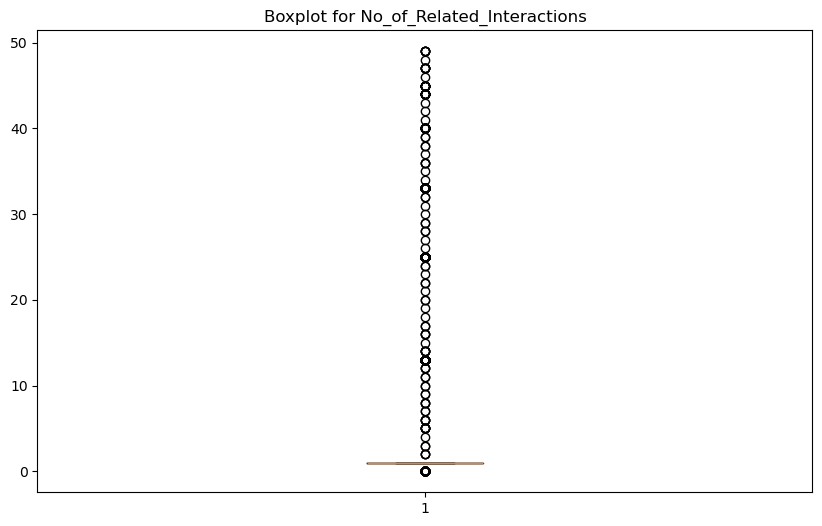

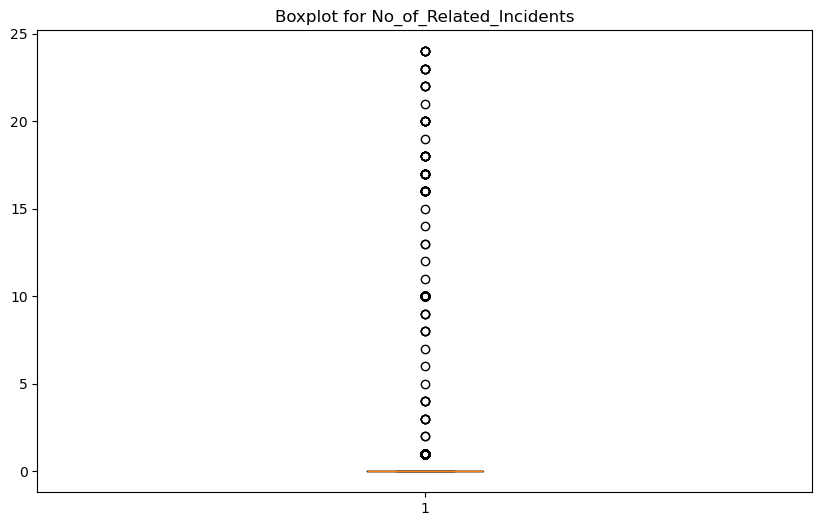

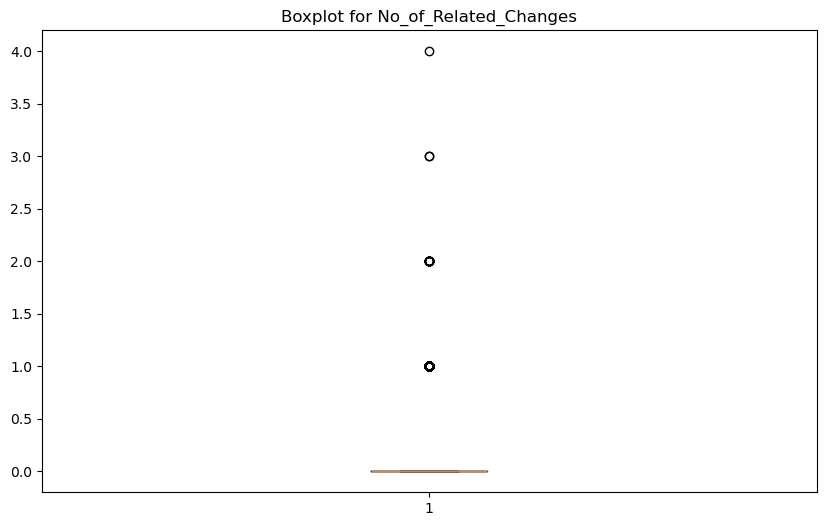

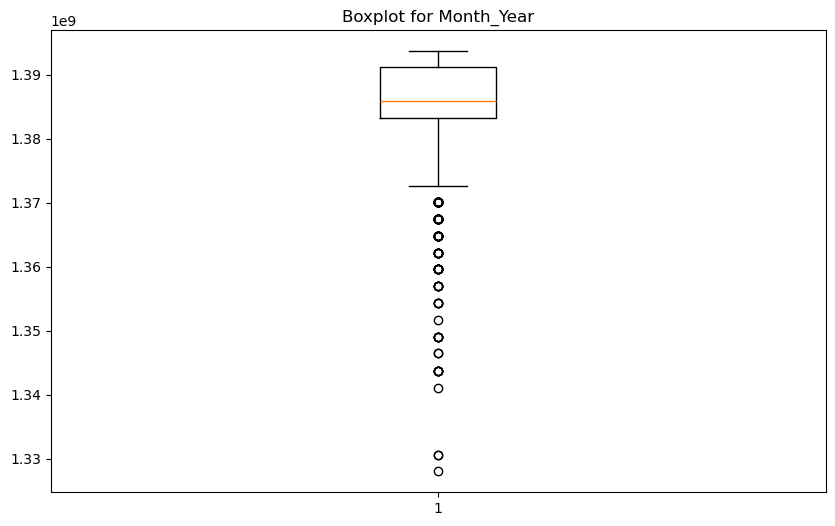

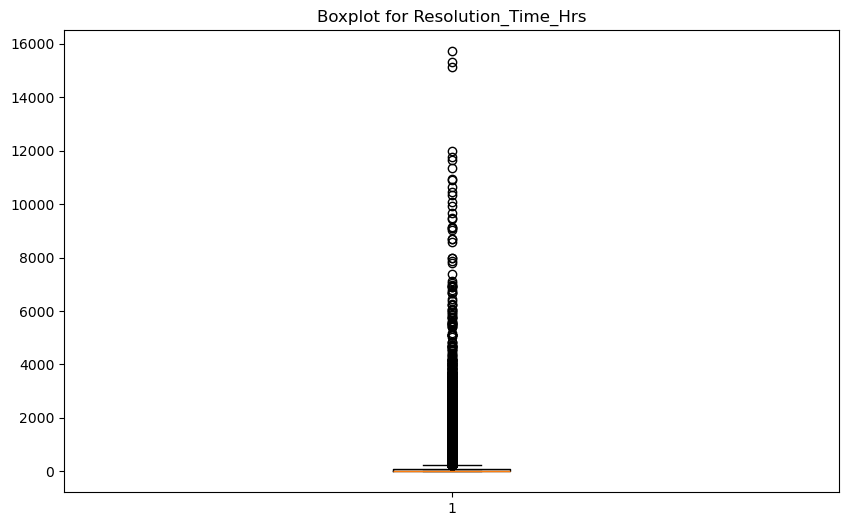

In [43]:
# Create a boxplot for each column
for col in df.columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [44]:
#Identifying Outliers
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
print(outliers)

0        15312.316667
1        15116.866667
2        15722.616667
3        11637.700000
4        10922.900000
             ...     
44711      258.700000
44736      238.316667
44911      240.583333
44961      241.516667
45020      238.750000
Name: Resolution_Time_Hrs, Length: 5175, dtype: float64


In [45]:
#Removing Outliers
from scipy import stats
z_scores = stats.zscore(df[col])
df1 = df[(z_scores > -3) & (z_scores < 3)]

In [46]:
df1

,Priority,number_cnt,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Month_Year,Resolution_Time_Hrs
205,4,41330,37,1.375777e+09,0,2075,1.380797e+09,21656,1,0,0,1.375315e+09,1394.483333
216,3,28668,33,1.375956e+09,0,7356,1.381155e+09,21704,1,0,0,1.375315e+09,1444.300000
219,3,35945,23,1.375976e+09,911,17,1.380615e+09,19150,13,0,0,1.375315e+09,1288.600000
225,3,36929,37,1.376319e+09,0,2080,1.380798e+09,20156,1,0,0,1.375315e+09,1244.400000
226,5,13296,13,1.376319e+09,0,2085,1.380799e+09,20158,1,0,0,1.375315e+09,1244.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,3,10891,1,1.396283e+09,0,33128,1.396283e+09,331,1,0,0,1.393632e+09,0.100000
46602,3,37599,1,1.396278e+09,0,33099,1.396280e+09,1497,1,0,0,1.393632e+09,0.433333
46603,4,42720,1,1.396280e+09,0,33101,1.396280e+09,248,1,0,0,1.393632e+09,0.066667
46604,3,32679,1,1.396280e+09,0,33108,1.396281e+09,407,1,0,0,1.393632e+09,0.116667


In [47]:
df1.columns

Index(['Priority', 'number_cnt', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes', 'Month_Year', 'Resolution_Time_Hrs'],
      dtype='object')

In [48]:
df1.isnull().sum()

Priority                      0
number_cnt                    0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Month_Year                    0
Resolution_Time_Hrs           0
dtype: int64

In [49]:
df1.shape

(45988, 13)

In [50]:
df.shape

(46606, 13)

# Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)

In [53]:
df1

,Priority,number_cnt,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Month_Year,Resolution_Time_Hrs
205,4,41330,37,1.375777e+09,0,2075,1.380797e+09,21656,1,0,0,1.375315e+09,1394.483333
216,3,28668,33,1.375956e+09,0,7356,1.381155e+09,21704,1,0,0,1.375315e+09,1444.300000
219,3,35945,23,1.375976e+09,911,17,1.380615e+09,19150,13,0,0,1.375315e+09,1288.600000
225,3,36929,37,1.376319e+09,0,2080,1.380798e+09,20156,1,0,0,1.375315e+09,1244.400000
226,5,13296,13,1.376319e+09,0,2085,1.380799e+09,20158,1,0,0,1.375315e+09,1244.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,3,10891,1,1.396283e+09,0,33128,1.396283e+09,331,1,0,0,1.393632e+09,0.100000
46602,3,37599,1,1.396278e+09,0,33099,1.396280e+09,1497,1,0,0,1.393632e+09,0.433333
46603,4,42720,1,1.396280e+09,0,33101,1.396280e+09,248,1,0,0,1.393632e+09,0.066667
46604,3,32679,1,1.396280e+09,0,33108,1.396281e+09,407,1,0,0,1.393632e+09,0.116667


# Data Splitting

In [55]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df1_scaled.drop('Resolution_Time_Hrs', axis=1)
y = df1_scaled['Resolution_Time_Hrs']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Implementation

In [57]:
# 1. Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)
y_pred_dtr = dtr_model.predict(X_test)# Import required libraries


mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

print(f"Decision Tree Regressor Metrics:")
print(f"MSE: {mse_dtr:.2f}")
print(f"MAE: {mae_dtr:.2f}")
print(f"R2: {r2_dtr:.2f}")
print(f"Accuracy: {r2_dtr:.2f}")  # Note: Accuracy is not directly applicable for regression models



Decision Tree Regressor Metrics:
MSE: 0.24
MAE: 0.17
R2: 0.77
Accuracy: 0.77


In [58]:
# 2. Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)

mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print(f"Random Forest Regressor Metrics:")
print(f"MSE: {mse_rfr:.2f}")
print(f"MAE: {mae_rfr:.2f}")
print(f"R2: {r2_rfr:.2f}")
print(f"Accuracy: {r2_rfr:.2f}")  # Note: Accuracy is not directly applicable for regression models

Random Forest Regressor Metrics:
MSE: 0.12
MAE: 0.14
R2: 0.88
Accuracy: 0.88


In [59]:
# 3. Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor Metrics:")
print(f"MSE: {mse_gbr:.2f}")
print(f"MAE: {mae_gbr:.2f}")
print(f"R2: {r2_gbr:.2f}")
print(f"Accuracy: {r2_gbr:.2f}")  # Note: Accuracy is not directly applicable for regression models

Gradient Boosting Regressor Metrics:
MSE: 0.15
MAE: 0.24
R2: 0.86
Accuracy: 0.86


In [60]:
#4. KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create a KNN regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_predict = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"KNeighborsRegressor Metrics:")
print("MSE: ", mse)
print("MAE: ", mae)
print("R2 Score: ", r2)

KNeighborsRegressor Metrics:
MSE:  0.6795867336120807
MAE:  0.38699613232165864
R2 Score:  0.3474799260198769


# Model Comparison

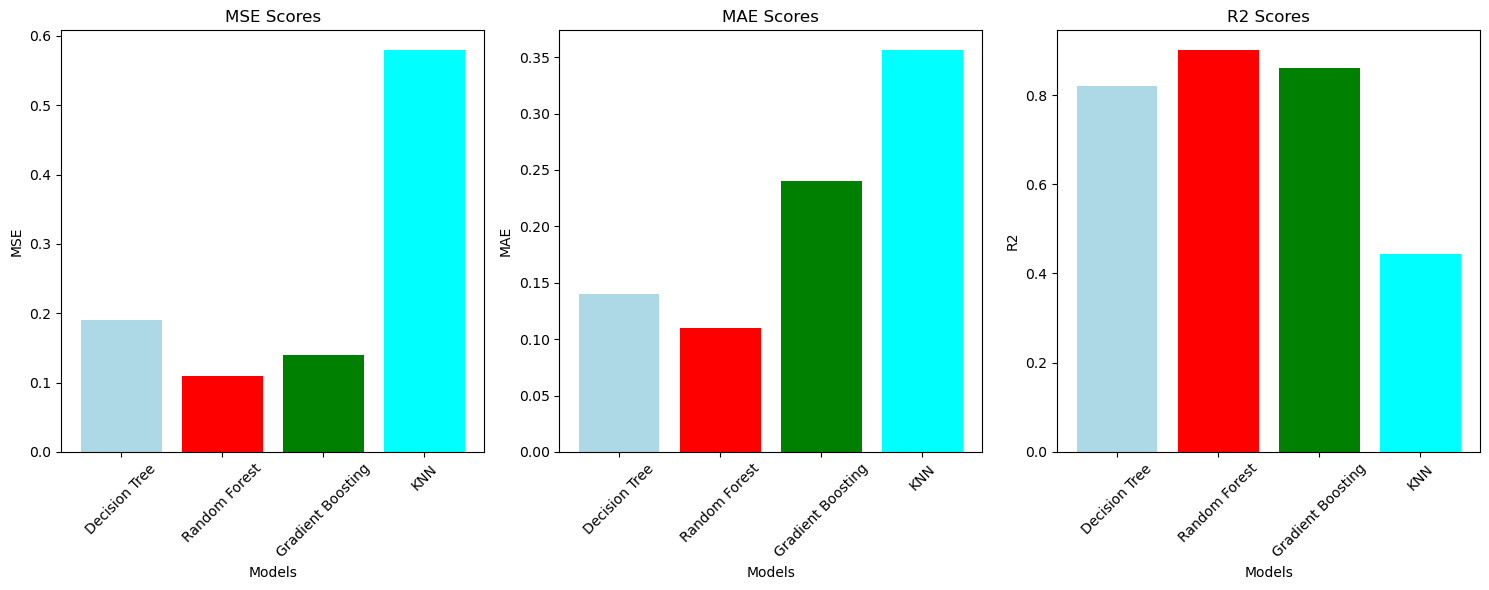

In [62]:
import matplotlib.pyplot as plt

# Define model names
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN']

# Define scores for each model
mse_scores = [0.19, 0.11, 0.14, 0.579]
mae_scores = [0.14, 0.11, 0.24, 0.356]
r2_scores = [0.82, 0.90, 0.86, 0.444]

# Create subplots for each score type
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Plot MSE scores
axs[0].bar(models, mse_scores, color=['lightblue', 'red', 'green', 'cyan'])
axs[0].set_title('MSE Scores')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('MSE')
axs[0].tick_params(axis='x', rotation=45)

# Plot MAE scores
axs[1].bar(models, mae_scores, color=['lightblue', 'red', 'green', 'cyan'])
axs[1].set_title('MAE Scores')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('MAE')
axs[1].tick_params(axis='x', rotation=45)

# Plot R2 scores
axs[2].bar(models, r2_scores, color=['lightblue', 'red', 'green', 'cyan'])
axs[2].set_title('R2 Scores')
axs[2].set_xlabel('Models')
axs[2].set_ylabel('R2')
axs[2].tick_params(axis='x', rotation=45)

# Layout so plots do not overlap
plt.tight_layout()

# Display the plot
plt.show()



- Random Forest is the top-performing model, with low MSE and MAE values and a high R2 value.
- Gradient Boosting is also performing well, with low MSE and MAE values and a relatively high R2 value.
- Decision Tree is a decent performer, but its MSE and MAE values are higher than those of Random Forest and Gradient Boosting.
- KNN is struggling to make accurate predictions and explain the variance in the

# Model evaluation

In [113]:
# 1. Predicting High Priority Tickets (P1 & P2)
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function for high priority prediction
def predict_high_priority(df):
    # Handle missing values
    df = df.fillna(df.mean())

    # Create binary target for priority 1 & 2
    df['high_priority'] = df['Priority'].isin([1, 2]).astype(int)

    # Feature selection
    X = df[['number_cnt', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs']]
    y = df['high_priority']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("High Priority Prediction Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

# Call the function
predict_high_priority(df1)

High Priority Prediction Metrics:
Accuracy: 0.88
Precision: 0.58
Recall: 0.12
F1 Score: 0.20


In [ ]:
# 30-Day Incident Volume Forecast

In [115]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define a function for incident volume forecasting
def forecast_incident_volume(df1):
    # Check if 'Open_Time' column exists
    if 'Open_Time' not in df1.columns:
        print("The column 'Open_Time' does not exist in the DataFrame.")
        return None

    # Convert 'Open_Time' to datetime format and set it as the index
    df1['Open_Time'] = pd.to_datetime(df1['Open_Time'], dayfirst=True)
    df1.set_index('Open_Time', inplace=True)

    # Resample data by day
    ts_data = df1.resample('D').size()

    # Split data into training and testing sets
    train = ts_data[:-30]
    test = ts_data[-30:]

    # Train an ARIMA model
    model = ARIMA(train, order=(1,1,1))
    model_fit = model.fit()

    # Make predictions on the test set
    forecast = model_fit.forecast(steps=30)
    return forecast

# Call the function and print the results
forecast = forecast_incident_volume(df.copy())
print(forecast)

2014-03-02    13.067208
2014-03-03    10.349052
2014-03-04    12.165623
2014-03-05    10.951590
2014-03-06    11.762941
2014-03-07    11.220707
2014-03-08    11.583087
2014-03-09    11.340905
2014-03-10    11.502758
2014-03-11    11.394590
2014-03-12    11.466880
2014-03-13    11.418568
2014-03-14    11.450855
2014-03-15    11.429277
2014-03-16    11.443698
2014-03-17    11.434060
2014-03-18    11.440501
2014-03-19    11.436197
2014-03-20    11.439073
2014-03-21    11.437151
2014-03-22    11.438436
2014-03-23    11.437577
2014-03-24    11.438151
2014-03-25    11.437767
2014-03-26    11.438024
2014-03-27    11.437852
2014-03-28    11.437967
2014-03-29    11.437890
2014-03-30    11.437941
2014-03-31    11.437907
Freq: D, Name: predicted_mean, dtype: float64


In [117]:
# 3. Auto-tagging Tickets
# =============================================
def auto_tag_tickets(df):
    # Prepare multi-label targets (priority + department)
    X = df.drop(['priority', 'department'], axis=1)
    y_priority = df['priority']
    y_dept = df['department']
    
    # Create pipeline for multi-output classification
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
            ('text', TfidfVectorizer(), 'description')
        ])
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', OneVsRestClassifier(SVC(kernel='linear', probability=True)))
    ])
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_priority, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("\nAuto-tagging Performance:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Priority Prediction Confusion Matrix')
    plt.show()
    
    return model

In [121]:
df1.columns

Index(['Priority', 'number_cnt', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes', 'Month_Year', 'Resolution_Time_Hrs'],
      dtype='object')

In [127]:
# 3. Auto-tagging Tickets
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Define a function for auto-tagging
def auto_tag_tickets(df):
    # Prepare target (Priority)
    X = df1.drop(['Priority'], axis=1)
    y = df1['Priority']

    # Define preprocessing steps
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    numeric_transformer = StandardScaler()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Create pipeline for regression
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("\nAuto-tagging Performance:")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

    return model

# Call the function and print the results
model = auto_tag_tickets(df.copy())
print(model)


Auto-tagging Performance:
Mean Squared Error: 0.54
Mean Absolute Error: 0.57
R2 Score: 0.06
RandomForestRegressor(random_state=42)


In [129]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform hyperparameter tuning
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train a new model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nAuto-tagging Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: nan

Auto-tagging Performance:
Mean Squared Error: 0.17
Mean Absolute Error: 0.41
R2 Score: 0.31



RFC Failure Prediction Metrics:
Mean Squared Error: 0.17
Mean Absolute Error: 0.42
R2 Score: 0.30


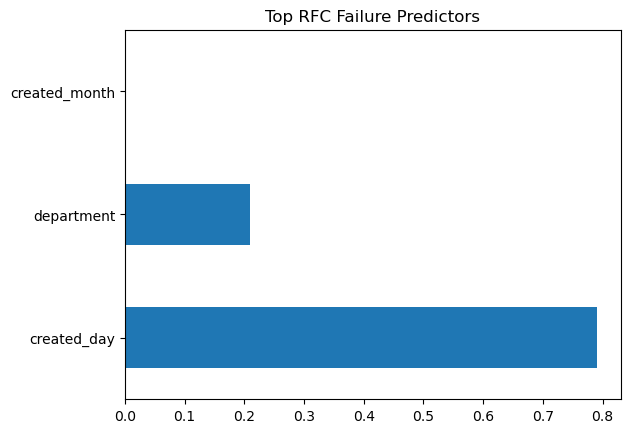

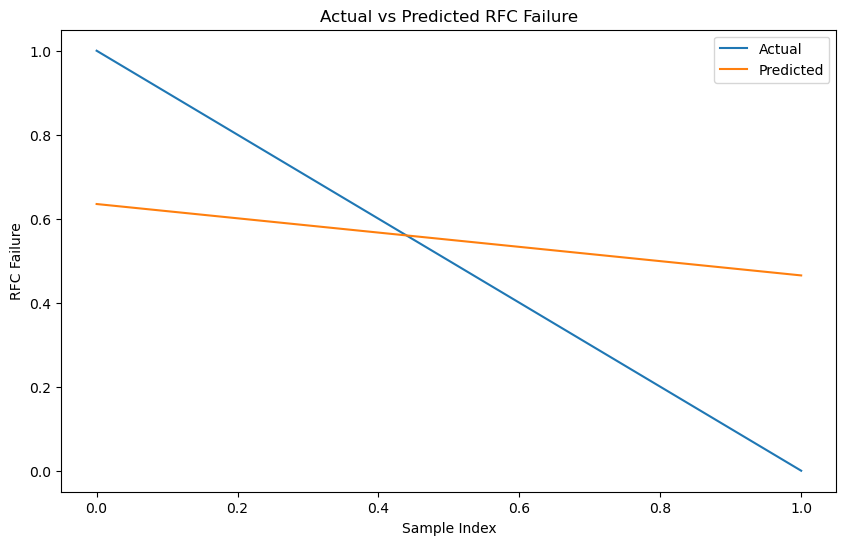

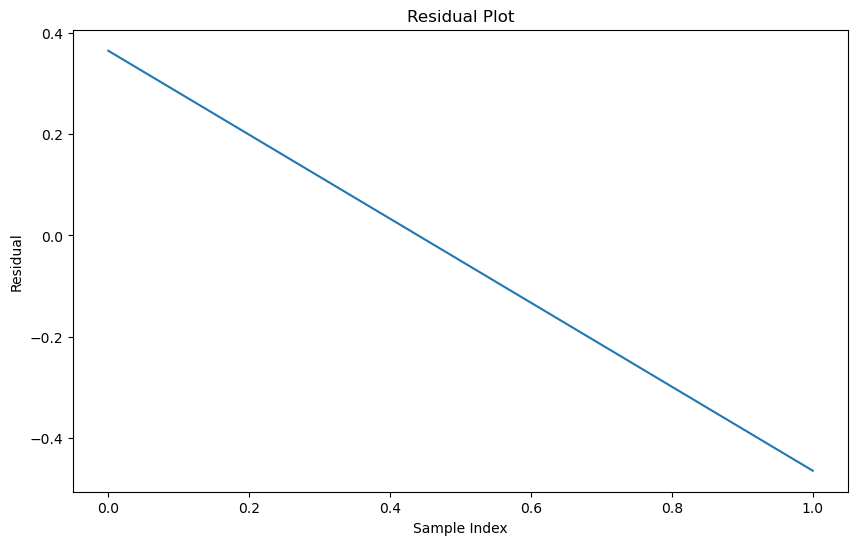

RandomForestRegressor(n_estimators=200, random_state=42)


In [147]:
# 4. RFC and Failure Prediction
import matplotlib.pyplot as plt

def predict_rfc_failures(df1):
    # ... (rest of the code remains the same)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nRFC Failure Prediction Metrics:")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

    # Feature importance
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title('Top RFC Failure Predictors')
    plt.show()

    # Actual vs Predicted Plot
    plt.figure(figsize=(10,6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title('Actual vs Predicted RFC Failure')
    plt.xlabel('Sample Index')
    plt.ylabel('RFC Failure')
    plt.legend()
    plt.show()

    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10,6))
    plt.plot(residuals)
    plt.title('Residual Plot')
    plt.xlabel('Sample Index')
    plt.ylabel('Residual')
    plt.show()

    return model

# Call the function and print the results
model = predict_rfc_failures(df.copy())
print(model)



# conclusion

# challenges faced